# Introduction to Visualization in yt

<div class="alert alert-block alert-info">
 
## Goals:

* Introduce `SlicePlot` class
* Learn how to annotate slice plots and change their style
    
</div>

In [14]:
import yt

We'll work with the IsolatedGalaxy dataset for most of this tutorial.

Set `download_datasets` to `True` and run the following to download the dataset into the current directory (*Note: in subsequent passes through this notebook, set `download_datasets` to `False` to avoid having to redownload it*)

In [15]:
download_datasets = False
if download_datasets:
    !curl -sSO https://yt-project.org/data/IsolatedGalaxy.tar.gz
    print("Got IsolatedGalaxy")
    !tar xzf IsolatedGalaxy.tar.gz

Now we can load the data.  This particular dataset is actually a directory and we need to point to a file in a subdirectory:

In [16]:
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2020-03-21 15:24:33,162 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-03-21 15:24:33,163 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-03-21 15:24:33,164 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-03-21 15:24:33,165 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-03-21 15:24:33,166 Parameters: cosmological_simulation   = 0.0


yt is designed for visualizing and analysing *volumetric data*&mdash;this is data that has a location in a volume and associated data value(s)

There are many different plot types:

* slices
* projections
* line plots
* profiles
* phase plots
* volume rendering
* surfaces
* streamlines

For slice plots, the best references are:

* The Cookbook: https://yt-project.org/docs/dev/cookbook/simple_plots.html
* Visualization reference: https://yt-project.org/docs/dev/visualizing/plots.html#slice-plots
* SlicePlot API: https://yt-project.org/docs/dev/reference/api/yt.visualization.plot_window.html#yt.visualization.plot_window.SlicePlot

Let's start by seeing what fields are available for us to look at:

In [17]:
ds.field_list

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 4134.86it/s]
yt : [INFO     ] 2020-03-21 15:24:34,302 Gathering a field list (this may take a moment.)


[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

## First Slice Plot

Let's see what the default settings generate for a slice plot.

The minimal information we need to provide are:
* the dataset
* the orthogonal direction
* the field to visualize.

yt : [INFO     ] 2020-03-21 15:24:36,179 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-21 15:24:36,180 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-21 15:24:36,181 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-21 15:24:36,182 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-21 15:24:36,184 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



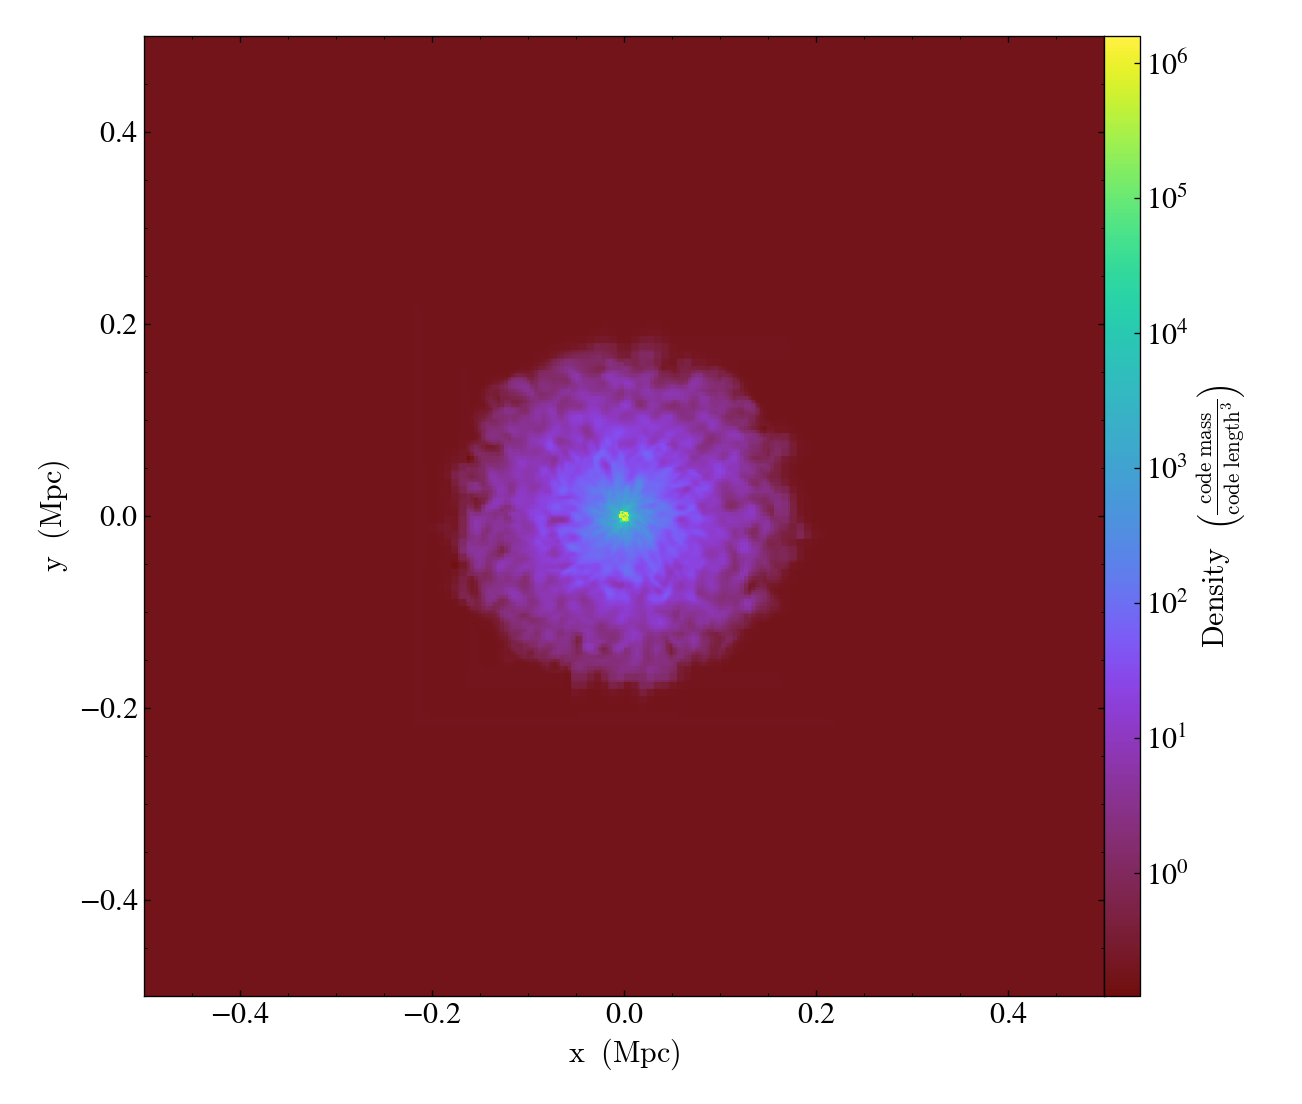

In [18]:
yt.SlicePlot(ds, "z", "Density")

There are a few things to note here:

* This is an example of an *axis-aligned slice plot*&mdash;we are using the natural coordinate axes of the dataset to define the slice normal.
* The coordinates have been shifted from their true values to have (0, 0) at the center.  This can be a big source of confusion, so we'll undo that below.
* The units appear on the axes and data range
* A log scale has been automatically applied to the data range.  This is true for most fields.

We can fix the coordinate problem by passing `origin = "native"` to `SlicePlot`:

yt : [INFO     ] 2020-03-21 15:30:55,149 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-21 15:30:55,150 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-21 15:30:55,151 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-21 15:30:55,152 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-21 15:30:55,154 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



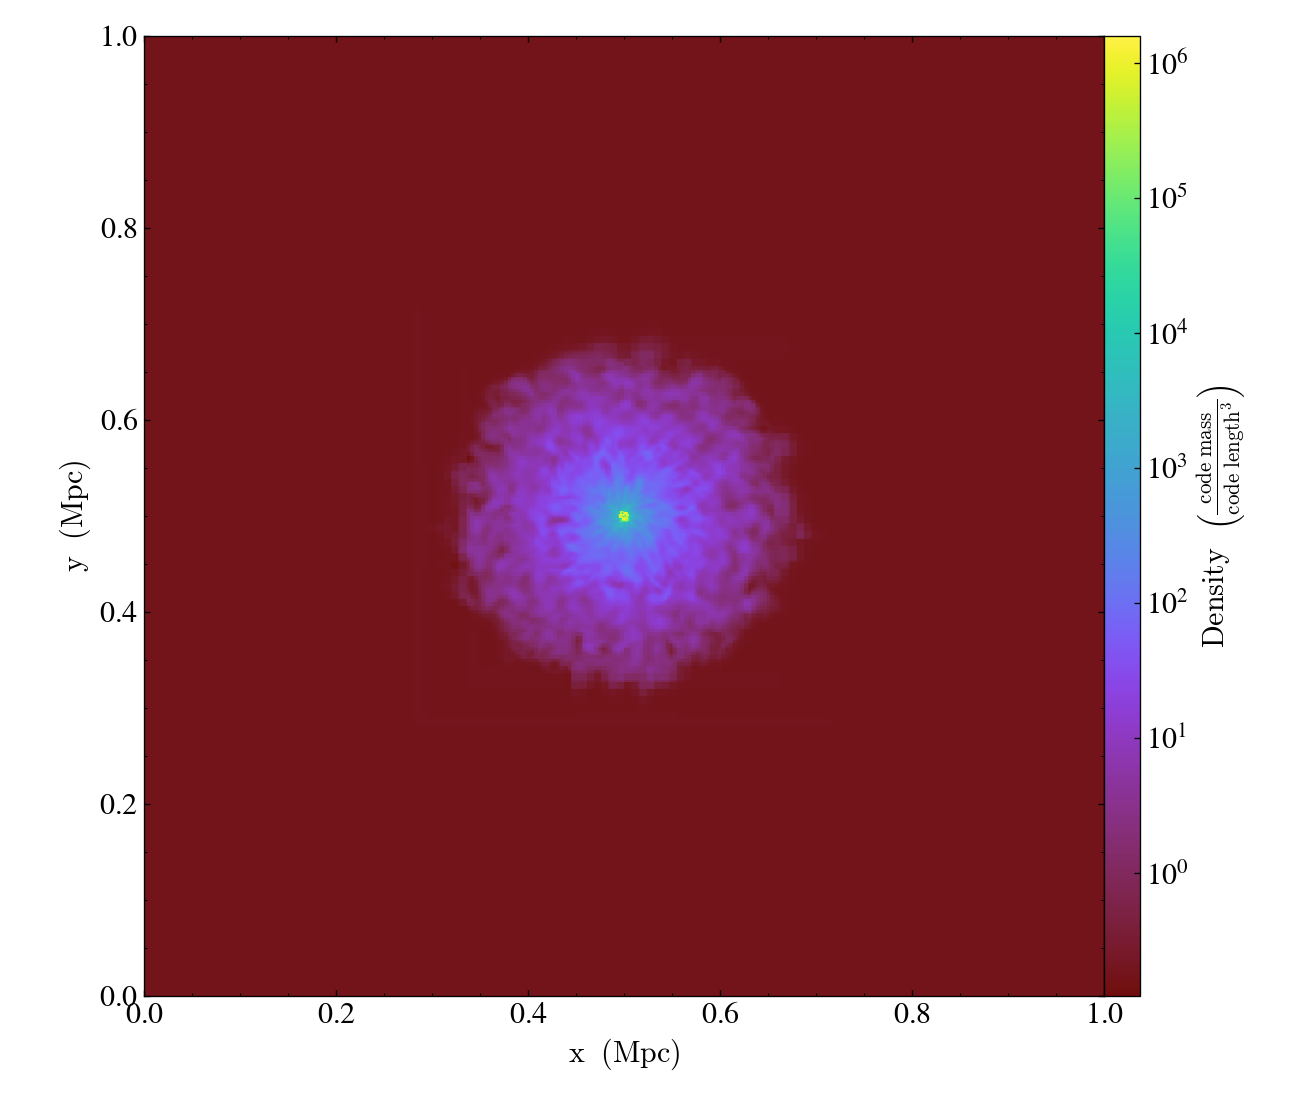

In [27]:
sp = yt.SlicePlot(ds, "z", "Density", origin="native")
sp

Here we stored the output of `SlicePlot` in a variable, `sp`.  Let's look at its type:

In [20]:
help(sp)

Help on AxisAlignedSlicePlot in module yt.visualization.plot_window object:

class AxisAlignedSlicePlot(PWViewerMPL)
 |  AxisAlignedSlicePlot(ds, axis, fields, center='c', width=None, axes_unit=None, origin='center-window', right_handed=True, fontsize=18, field_parameters=None, window_size=8.0, aspect=None, data_source=None, buff_size=(800, 800))
 |  
 |  Creates a slice plot from a dataset
 |  
 |  Given a ds object, an axis to slice along, and a field name
 |  string, this will return a PWViewerMPL object containing
 |  the plot.
 |  
 |  The plot can be updated using one of the many helper functions
 |  defined in PlotWindow.
 |  
 |  Parameters
 |  ----------
 |  ds : `Dataset`
 |       This is the dataset object corresponding to the
 |       simulation output to be plotted.
 |  axis : int or one of 'x', 'y', 'z'
 |       An int corresponding to the axis to slice along (0=x, 1=y, 2=z)
 |       or the axis name itself
 |  fields : string
 |       The name of the field(s) to be plott

This tells us that it is an `AxisAlignedSlicePlot` object, and that it shares its styling with the `PlotWindow` class.

We'll use the object returned from `SlicePlot` to style and annotate the plot

## Zooming and resizing

If we want to zoom by a particular factor, we can use the `.zoom()` method.  

Note, if we use `.zoom()` several times on a `SlicePlot` object, each instance works from the last magnification, not the original plot.

yt : [INFO     ] 2020-03-21 15:31:05,813 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



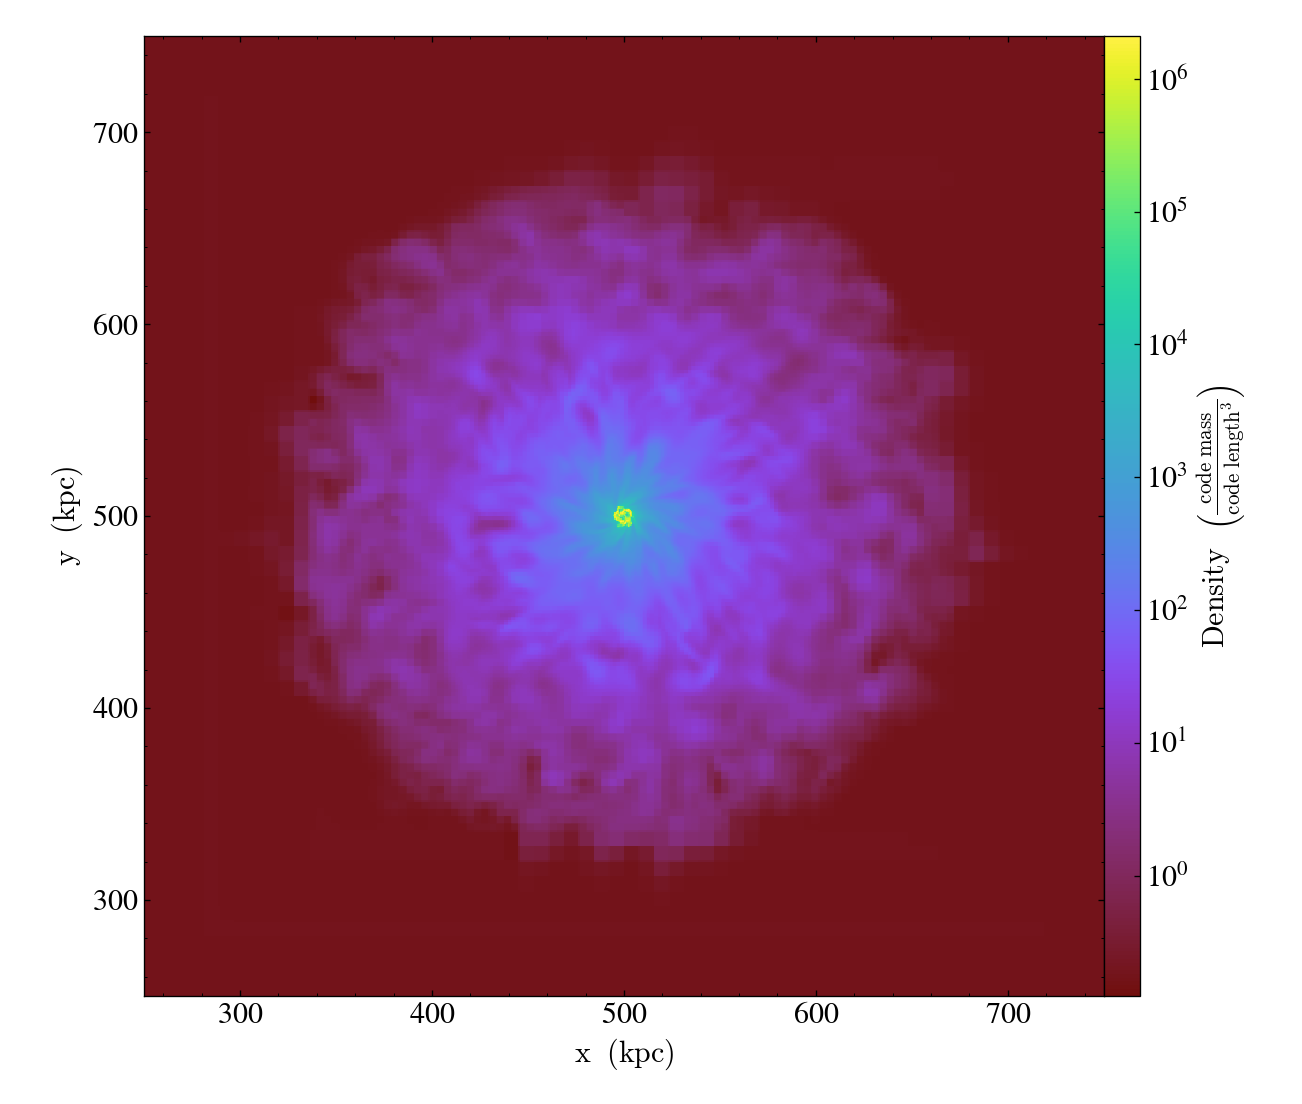

In [28]:
sp.zoom(2)

yt : [INFO     ] 2020-03-21 15:31:12,131 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



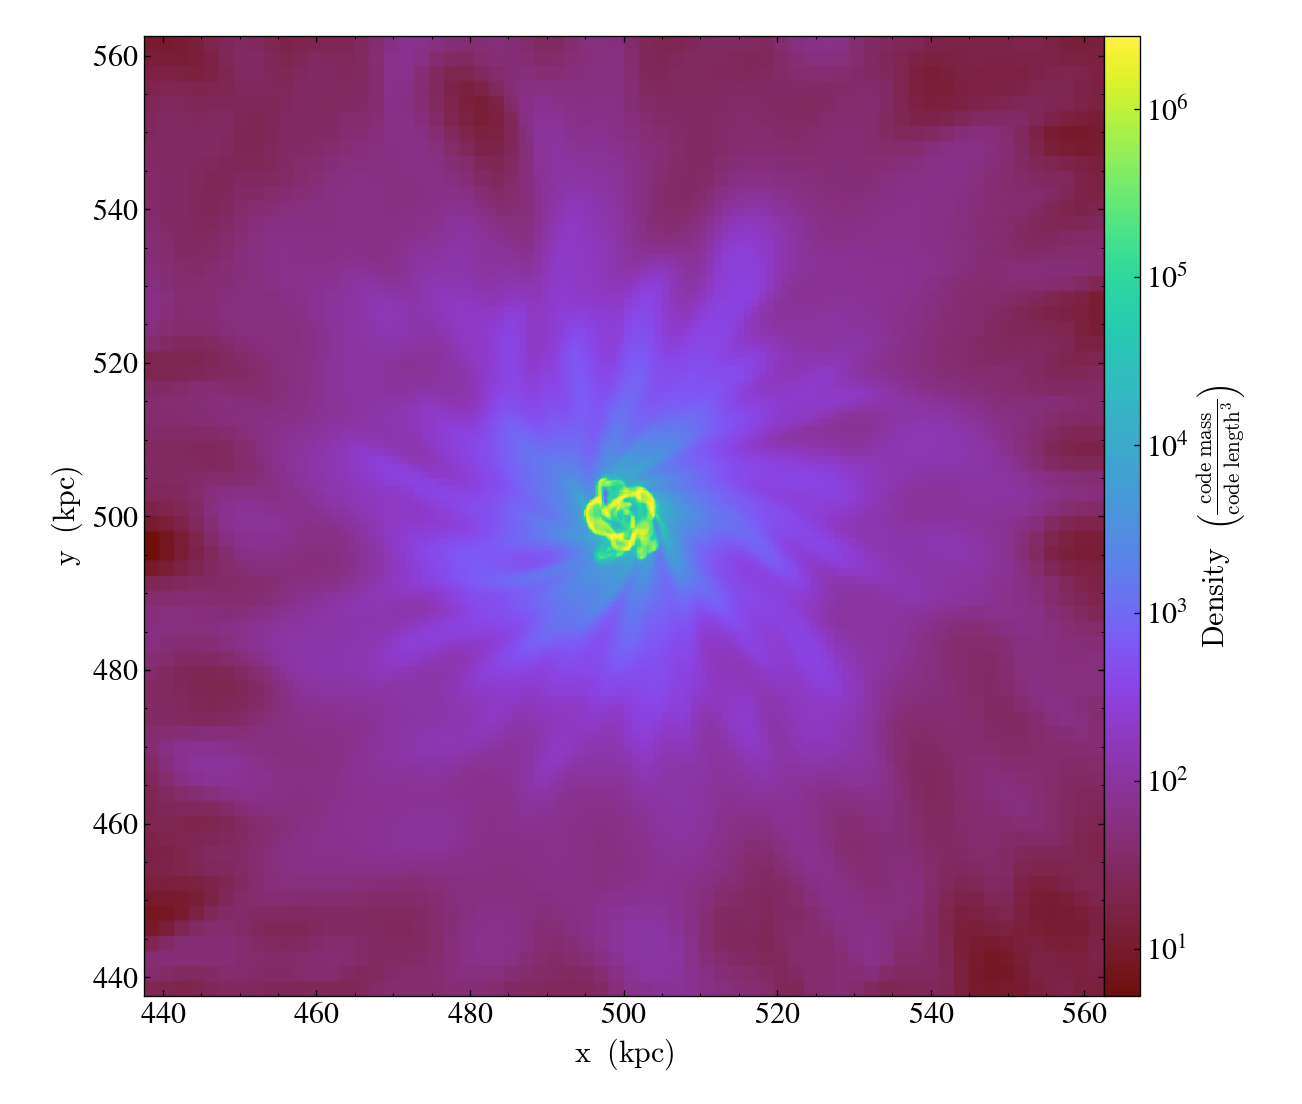

In [29]:
sp.zoom(4)

yt : [INFO     ] 2020-03-21 15:31:38,270 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



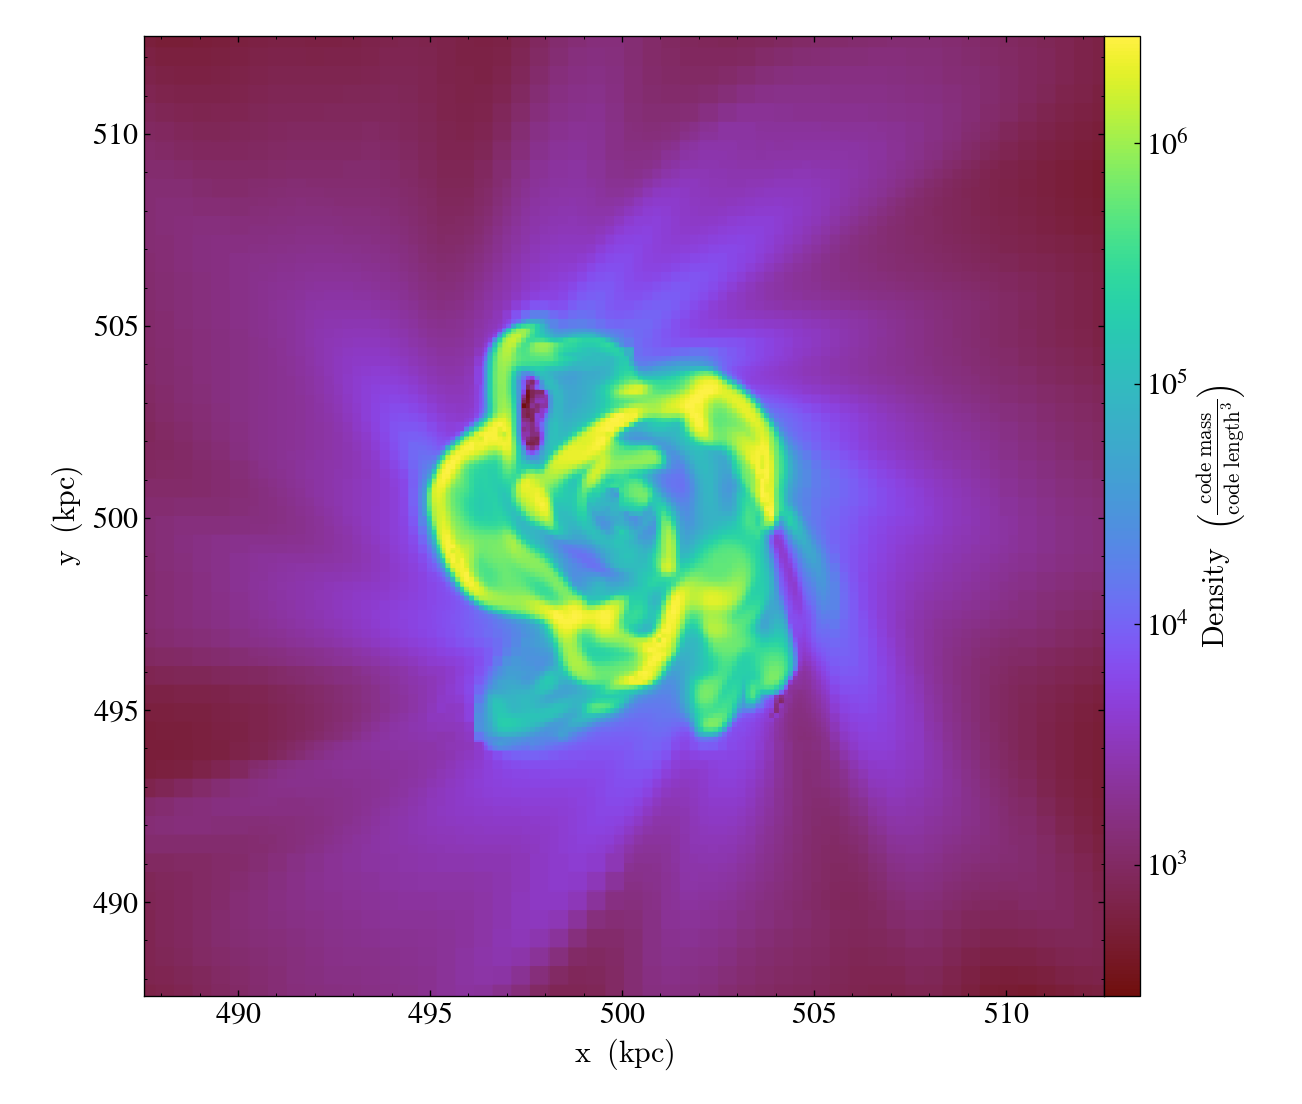

In [30]:
sp.zoom(5)

## Multiple Fields

## Visualizing the Grid

## Styling and Accessing the Plot Directly

## 2-D and Axisymmetric Data

<div style="background-color:yellow; padding: 10px"><h3><span class="fa fa-flash"></span> Quick Exercise:</h3></div>

The origin of the coordinates can be set via the keyword `origin` provide to the `SlicePlot` call.  Access the help for `SlicePlot` via
```
help(yt.SlicePlot)
```
and see how to change the coordinates to those in the dataset and remake the slice.
<hr>